In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import statsmodels.api as sm

# Part 1 Rolling trend comparison

In [3]:
df_city=pd.read_csv('gt_bycity.csv')
df_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [4]:
#Exploring the data
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
dt                               object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             object
Country                          object
Latitude                         object
Longitude                        object
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [19]:
#Filter the US temp data
df_us=df_city.query('Country=="United States"')
#change the date datatype to timestamp
df_us_new=df_us.copy()
df_us_new['dt']=pd.to_datetime(df_us['dt'])
df_us_new.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W


In [21]:
#Add the year and month column and parse the date to year and month
df_us_new['year'] = df_us_new['dt'].map(lambda x: x.year)
df_us_new['month'] = df_us_new['dt'].map(lambda x: x.month)
df_us_new.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W,1820,1
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W,1820,2
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W,1820,3
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W,1820,4
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W,1820,5


In [22]:
#Check the duplicates 
sum(df_us_new.duplicated())

0

In [23]:
#Check if any non-value
df_us_new.isnull().any()
#Drop the null value
df_us_new.dropna(inplace=True)
df_us_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661524 entries, 47555 to 8439246
Data columns (total 9 columns):
dt                               661524 non-null datetime64[ns]
AverageTemperature               661524 non-null float64
AverageTemperatureUncertainty    661524 non-null float64
City                             661524 non-null object
Country                          661524 non-null object
Latitude                         661524 non-null object
Longitude                        661524 non-null object
year                             661524 non-null int64
month                            661524 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 50.5+ MB


In [24]:
#Groupby 
df_us_g=df_us_new.groupby(['dt']).mean()
df_us_g
df_us_g.drop(['year','month'], axis=1, inplace=True)
df_us_g=df_us_g.reset_index()
df_us_g.head()

,dt,AverageTemperature,AverageTemperatureUncertainty
0,1743-11-01,5.818071,2.042153
1,1744-04-01,12.760439,2.214296
2,1744-05-01,17.082939,1.844694
3,1744-06-01,22.232969,1.745694
4,1744-07-01,23.499459,1.585663


In [25]:
df_us_g['year'] = df_us_g['dt'].map(lambda x: x.year)
df_us_g['month'] = df_us_g['dt'].map(lambda x: x.month)
df_us_g.head()
df_us_g.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,year,month
3136,2013-05-01,18.643377,0.316860,2013,5
3137,2013-06-01,23.226323,0.306031,2013,6
3138,2013-07-01,24.925054,0.305533,2013,7
3139,2013-08-01,24.107261,0.383113,2013,8
3140,2013-09-01,22.339172,1.066199,2013,9


In [26]:
#Data Wrangling for global temp data
df_global=pd.read_csv('gt.csv')
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [27]:
#Data Wrangling for SOI data
df_soi=pd.read_csv('soi.csv',skiprows=1)
df_soi.info()
df_soi['Date']=df_soi['Date'].map(lambda x: x*100+1)
df_soi.head()
date=df_soi['Date'].astype(str)
df_soi['Date']=date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 2 columns):
Date     818 non-null int64
Value    818 non-null float64
dtypes: float64(1), int64(1)
memory usage: 12.9 KB


In [28]:
#change the date datatype to timestamp
dt=pd.to_datetime(df_soi['Date'])
df_soi['Date']=dt

In [29]:
#add the year and month column and parse the date to year and month
df_soi['year'] = df_soi['Date'].map(lambda x: x.year)
df_soi['month'] = df_soi['Date'].map(lambda x: x.month)

In [30]:
#Drop column date
df_soi.drop(['Date'], axis=1,inplace=True)

In [31]:
#Check any duplicate data
sum(df_soi.duplicated())

0

In [32]:
#Check any null value
df_soi.isnull().any()

Value    False
year     False
month    False
dtype: bool

In [33]:
df_soi.head()

,Value,year,month
0,1.5,1951,1
1,0.9,1951,2
2,-0.1,1951,3
3,-0.3,1951,4
4,-0.7,1951,5


In [34]:
#Data Wrangling for atmospherical CO2 data
df_co2=pd.read_csv('archive.csv')
df_co2.head()
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
Year                                 720 non-null int64
Month                                720 non-null int64
Decimal Date                         720 non-null float64
Carbon Dioxide (ppm)                 703 non-null float64
Seasonally Adjusted CO2 (ppm)        703 non-null float64
Carbon Dioxide Fit (ppm)             707 non-null float64
Seasonally Adjusted CO2 Fit (ppm)    707 non-null float64
dtypes: float64(5), int64(2)
memory usage: 39.5 KB


In [35]:
#drop na value
df_co2.dropna(inplace=True)
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 2 to 708
Data columns (total 7 columns):
Year                                 702 non-null int64
Month                                702 non-null int64
Decimal Date                         702 non-null float64
Carbon Dioxide (ppm)                 702 non-null float64
Seasonally Adjusted CO2 (ppm)        702 non-null float64
Carbon Dioxide Fit (ppm)             702 non-null float64
Seasonally Adjusted CO2 Fit (ppm)    702 non-null float64
dtypes: float64(5), int64(2)
memory usage: 43.9 KB


In [36]:
#check if any duplicate 
sum(df_co2.duplicated())

0

In [38]:
#calulate us annual temp average(from 1750-2013)
df_us_year=df_us_new.groupby('year').mean().query('year>=1750')
df_us_year=df_us_year.reset_index()

In [39]:
#global temp average(from 1750-2013)
df_gt13=df_global[:-2]

In [40]:
#merge two dataframe
df_combine=pd.merge(df_us_year, df_gt13)

In [41]:
#rolling 10 MA
rolling=df_combine[['avg_temp', 'AverageTemperature']].rolling(10, center=True).mean()
rolling['year']=(df_combine['year']+5)

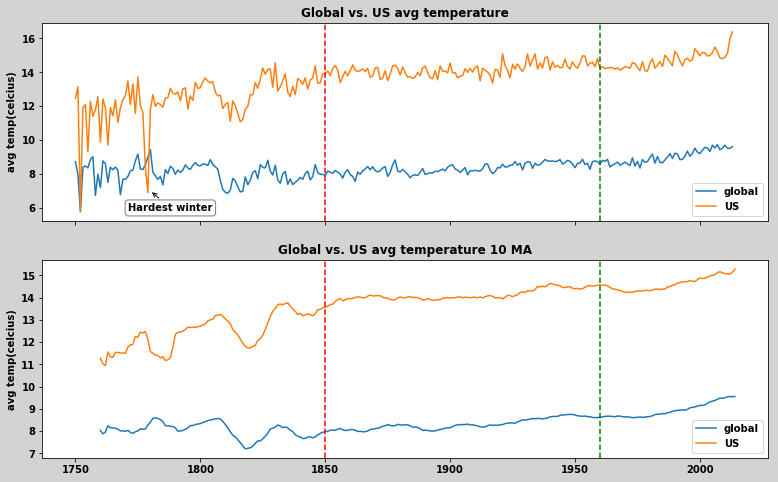

In [42]:
fig, ax= plt.subplots(2,facecolor='lightgray', figsize=(13,8) ,sharex=True)
ax[0].plot(df_combine['year'], df_combine['avg_temp'], label='global')
ax[0].plot(df_combine['year'], df_combine['AverageTemperature'], label='US')
ax[1].plot(rolling['year'], rolling['avg_temp'], label='global')
ax[1].plot(rolling['year'], rolling['AverageTemperature'], label='US')
ax[0].set(title='Global vs. US avg temperature',
         ylabel='avg temp(celcius)')
ax[1].set(title='Global vs. US avg temperature 10 MA',
         ylabel='avg temp(celcius)')
ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')
ax[0].annotate('Hardest winter', xy=(1780,7) ,xycoords='data',
            bbox=dict(boxstyle='round',fc='none', ec='gray'), xytext=(20,-20),
              textcoords='offset points', ha='center', arrowprops=dict(arrowstyle='->'))
ax[0].axvline(1850, color='r', linestyle='--')
ax[1].axvline(1850, color='r', linestyle='--');
ax[0].axvline(1960, color='g', linestyle='--')
ax[1].axvline(1960, color='g', linestyle='--');

# Part 2. Multiple regression

In [383]:
#Rename the columns of year and month as further merge key
df_co2.rename(index=str, columns={'Year': 'year', 'Month': "month"}, inplace=True)
df_co2.head()
df_co2.tail()
#Extract complete data from 2012-1959 of the df_co2
df_co2=df_co2.query('year>=1959 & year<=2012')
df_co2['Date'] = pd.to_datetime(df_co2[['year', 'month']].assign(Day=1))
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 12 to 659
Data columns (total 8 columns):
year                                 645 non-null int64
month                                645 non-null int64
Decimal Date                         645 non-null float64
Carbon Dioxide (ppm)                 645 non-null float64
Seasonally Adjusted CO2 (ppm)        645 non-null float64
Carbon Dioxide Fit (ppm)             645 non-null float64
Seasonally Adjusted CO2 Fit (ppm)    645 non-null float64
Date                                 645 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 45.4+ KB


In [377]:
#Extract the data from average us temperature from 1959 to 2012
df_us_g=df_us_g.query('year>=1959 & year<=2012')
#Combine the column of year and month
df_us_g['Date'] = pd.to_datetime(df_us[['year', 'month']].assign(Day=1))
df_us_g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 2484 to 3131
Data columns (total 6 columns):
dt                               648 non-null datetime64[ns]
AverageTemperature               648 non-null float64
AverageTemperatureUncertainty    648 non-null float64
year                             648 non-null int64
month                            648 non-null int64
Date                             0 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2)
memory usage: 35.4 KB


In [378]:
#Extract the data from SOI from 1959 to 2012
df_soi=df_soi.query('year>=1959 & year<=2012')
df_soi['Date'] = pd.to_datetime(df_soi[['year', 'month']].assign(Day=1))
df_soi.head()
df_soi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 96 to 743
Data columns (total 4 columns):
Value    648 non-null float64
year     648 non-null int64
month    648 non-null int64
Date     648 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 25.3 KB


In [393]:
#Merge the above 3 dataframe for further analysis
df_int=df_soi.merge(df_us_g, left_on=['Date'], right_on=['dt'])
df_merged=df_int.merge(df_co2, left_on=['dt'], right_on=['Date'])
df_merged.drop(['year_x','month_x','Date_x','AverageTemperatureUncertainty','year_y','month_y','dt','Date_y'],
               axis=1, inplace=True)
df_merged.head()


,Value,AverageTemperature,year,month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Date
0,-0.9,4.189265,1959,1,1959.0411,315.58,315.56,315.60,315.57,1959-01-01
1,-1.4,5.734759,1959,2,1959.1260,316.48,315.88,316.24,315.63,1959-02-01
2,1.3,9.552300,1959,3,1959.2027,316.65,315.37,316.98,315.69,1959-03-01
3,0.4,14.300163,1959,4,1959.2877,317.72,315.41,318.09,315.76,1959-04-01
4,0.5,18.636934,1959,5,1959.3699,318.29,315.51,318.62,315.84,1959-05-01


In [394]:
#Rename the column name for future usage 
df_merged.rename(index=str, columns={'Carbon Dioxide (ppm)': 'co2_level', 
                                    'AverageTemperature': 'avg_temp',
                                    'Value': 'soi'}, inplace=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 0 to 644
Data columns (total 10 columns):
soi                                  645 non-null float64
avg_temp                             645 non-null float64
year                                 645 non-null int64
month                                645 non-null int64
Decimal Date                         645 non-null float64
co2_level                            645 non-null float64
Seasonally Adjusted CO2 (ppm)        645 non-null float64
Carbon Dioxide Fit (ppm)             645 non-null float64
Seasonally Adjusted CO2 Fit (ppm)    645 non-null float64
Date                                 645 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 55.4+ KB


In [396]:
#Data range of the dataframe
df_merged.describe()

,soi,avg_temp,year,month,Decimal Date,co2_level,Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,0.131783,14.685377,1985.600000,6.516279,1986.098853,349.117225,349.118868,349.113907,349.115612
std,0.970655,7.169991,15.564771,3.454019,15.565561,23.309300,23.232193,23.308225,23.230592
min,-3.600000,0.714307,1959.000000,1.000000,1959.041100,313.340000,315.370000,313.330000,315.570000
25%,-0.500000,8.115903,1972.000000,4.000000,1972.707700,328.040000,327.860000,328.190000,327.900000
50%,0.100000,14.968494,1986.000000,7.000000,1986.126000,346.900000,346.410000,346.720000,346.580000
75%,0.800000,21.663716,1999.000000,10.000000,1999.537000,368.120000,368.370000,368.000000,368.330000
max,2.900000,26.047984,2012.000000,12.000000,2012.956300,396.870000,395.270000,396.870000,395.160000


### Categorize the SOI
> * `el_nino`represents the strong el nino phenomenal was observed(soi from -3.6 to -1)
> * `normal`represents the normal year(soi from -1 to 1)
> * `la_nina`represents the strong la nina phenomenal was observed(soi from 1 to 2.9)

In [436]:
df_merged['enso']=pd.cut(df_merged['soi'], bins=[-3.6, -1.5, 1.5, 2.9], 
                         include_lowest=True, labels=['el_nino', 'normal', 'la_nina'])
df_merged.head()

,soi,avg_temp,year,month,Decimal Date,co2_level,Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Date,enso,anomaly
0,-0.9,4.189265,1959,1,1959.0411,315.58,315.56,315.60,315.57,1959-01-01,normal,-10.281538
1,-1.4,5.734759,1959,2,1959.1260,316.48,315.88,316.24,315.63,1959-02-01,normal,-8.736044
2,1.3,9.552300,1959,3,1959.2027,316.65,315.37,316.98,315.69,1959-03-01,normal,-4.918503
3,0.4,14.300163,1959,4,1959.2877,317.72,315.41,318.09,315.76,1959-04-01,normal,-0.170639
4,0.5,18.636934,1959,5,1959.3699,318.29,315.51,318.62,315.84,1959-05-01,normal,4.166131


C:\Users\chrag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


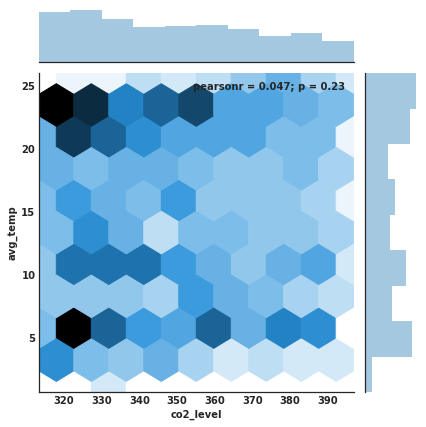

In [417]:
#Data visulization to see any relationship between the variable
import matplotlib as mpl
with sns.axes_style('white'):
    g=sns.jointplot('co2_level','avg_temp', data=df_merged, kind='hex')

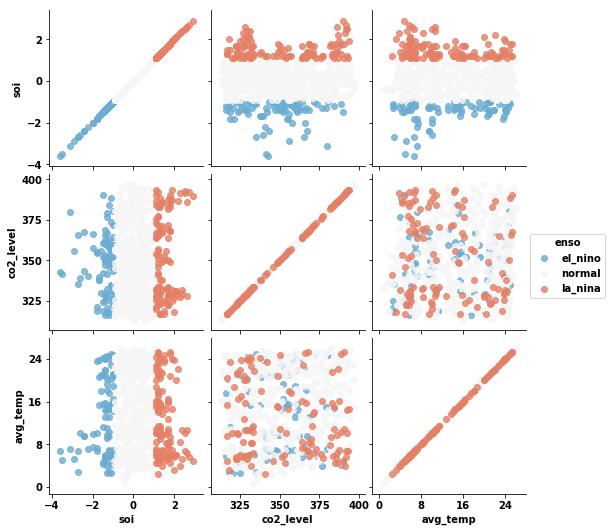

In [418]:
#Further check the relationship between co2_level and soi, and temperature
import matplotlib as mpl
#correlation
g=sns.PairGrid(df_merged, vars=['soi', 'co2_level','avg_temp'],
              hue='enso', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()
for ax in g.axes.flat:
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4, prune="both"))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4, prune="both"))
g.fig.subplots_adjust(hspace=.05, wspace=.05);

##### From above two plots, we didn't find any patterns or relation ship between ENSO, CO2 level and average temperature. Thus,  I calculated the mean temperature from 1959 - 1990 period to establish the US base mean temperature.The deviation from this temperature is added in the Anomaly column. 

In [430]:
reference_temp=((df_merged.groupby(['year']).mean()['avg_temp']).iloc[0:32]).mean()

In [437]:
df_merged['anomaly']=df_merged['avg_temp']-reference_temp

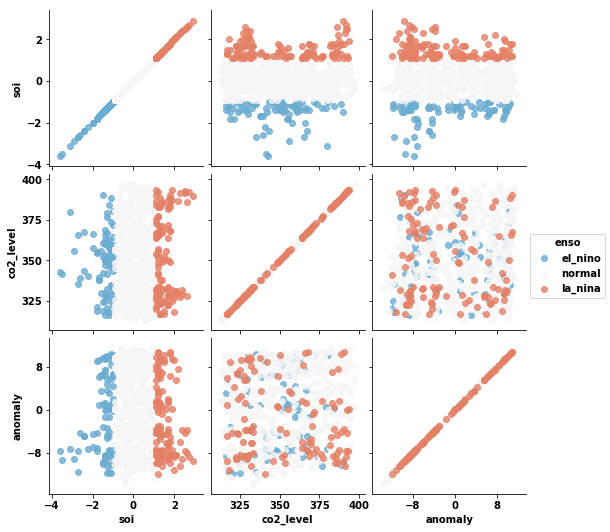

In [434]:
g=sns.PairGrid(df_merged, vars=['soi', 'co2_level','anomaly'],
              hue='enso', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()
for ax in g.axes.flat:
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4, prune="both"))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4, prune="both"))
g.fig.subplots_adjust(hspace=.05, wspace=.05);

C:\Users\chrag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


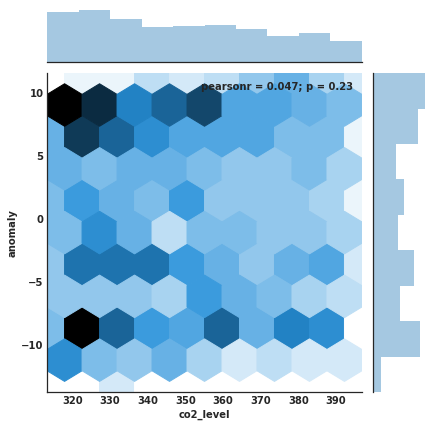

In [435]:
with sns.axes_style('white'):
    g=sns.jointplot('co2_level','anomaly', data=df_merged, kind='hex')

### Oops, still doesn't get the results we expected. I think maybe I made mistake to use annual data to compare with the monthly data and ignore the seasonality behind the data. I try to fix this problems by creating seasonal baseline for temperature.

In [462]:
#Caluclated the jan and jul temperature data
Jan_avg_temp=(df_merged.groupby(['month']).mean()).iloc[0, 1]
Jul_avg_temp=(df_merged.groupby(['month']).mean()).iloc[6, 1]
print('the average temperature for Jan is {} degress celsius'.format(Jan_avg_temp))
print('the average temperature for Jul is {} degress celsius'.format(Jul_avg_temp))

the average temperature for Jan is 4.393304222510447 degress celsius
the average temperature for Jul is 24.606537109093527 degress celsius


In [463]:
#Extracted winter and summer data from the orignial merged dataset
df_winter=df_merged.query('month==1')
df_summer=df_merged.query('month==7')

In [464]:
df_winter.drop(['anomaly'], axis=1, inplace=True)

C:\Users\chrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [465]:
#Create new anomaly for 2 seasons
df_winter['anomaly']=df_winter['avg_temp']-Jan_avg_temp

C:\Users\chrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [466]:
df_winter.head()

,soi,avg_temp,year,month,Decimal Date,co2_level,Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Date,enso,anomaly
0,-0.9,4.189265,1959,1,1959.0411,315.58,315.56,315.60,315.57,1959-01-01,normal,-0.204040
12,0.1,4.199381,1960,1,1960.0410,316.43,316.41,316.58,316.56,1960-01-01,normal,-0.193923
24,-0.3,3.599770,1961,1,1961.0411,316.90,316.88,317.22,317.19,1961-01-01,normal,-0.793534
36,2.0,3.158000,1962,1,1962.0411,317.94,317.92,318.15,318.12,1962-01-01,la_nina,-1.235304
48,1.0,1.880241,1963,1,1963.0411,318.74,318.72,318.79,318.76,1963-01-01,normal,-2.513063


In [467]:
df_summer['anomaly']=df_summer['avg_temp']-Jul_avg_temp

C:\Users\chrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [468]:
df_summer.head()

,soi,avg_temp,year,month,Decimal Date,co2_level,Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Date,enso,anomaly
6,-0.3,24.653767,1959,7,1959.5370,316.54,315.85,316.68,316.02,1959-07-01,normal,0.047229
18,0.5,24.313506,1960,7,1960.5383,318.18,317.51,317.62,316.98,1960-07-01,normal,-0.293031
30,0.2,24.321152,1961,7,1961.5370,318.57,317.87,318.34,317.67,1961-07-01,normal,-0.285385
42,0.1,23.598774,1962,7,1962.5370,319.61,318.91,319.17,318.50,1962-07-01,normal,-1.007763
54,-0.1,24.184537,1963,7,1963.5370,319.74,319.04,319.72,319.05,1963-07-01,normal,-0.422000


C:\Users\chrag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


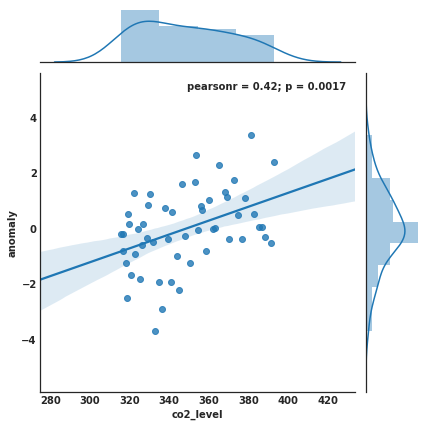

In [469]:
#Now we try to see the relationship based on different season
#For winter season
with sns.axes_style('white'):
    g=sns.jointplot('co2_level','anomaly', data=df_winter, kind='reg')

C:\Users\chrag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


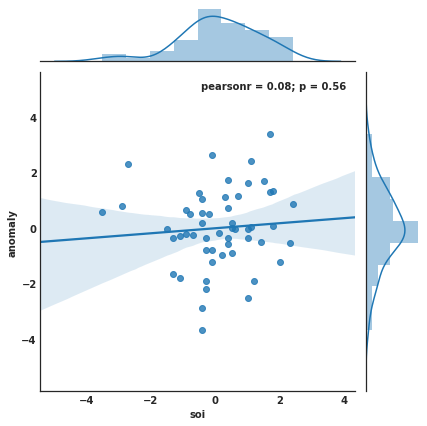

In [471]:
with sns.axes_style('white'):
    g=sns.jointplot('soi','anomaly', data=df_winter, kind='reg')

C:\Users\chrag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


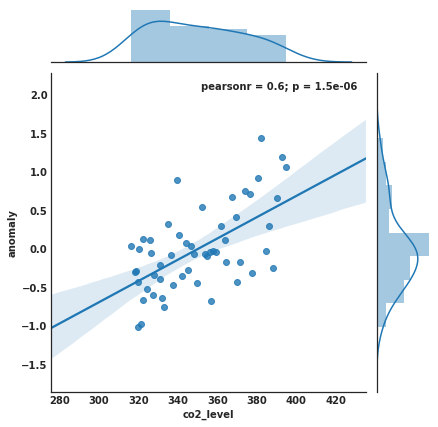

In [472]:
#For summer season
with sns.axes_style('white'):
    g=sns.jointplot('co2_level','anomaly', data=df_summer, kind='reg');

C:\Users\chrag\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


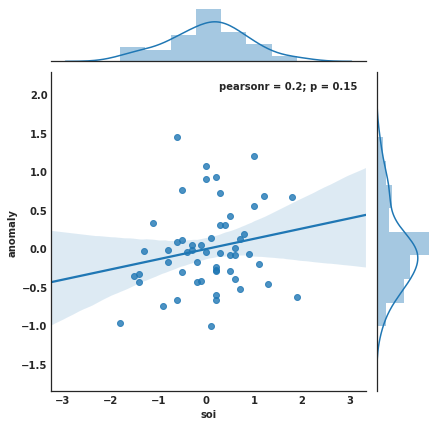

In [473]:
with sns.axes_style('white'):
    g=sns.jointplot('soi','anomaly', data=df_summer, kind='reg');

### Based on above plots and p-value we can see a positive relationship between the CO2 level and temperature as we expected. However, the relationship between the soi are not that obvious. I think it is due to the fact that we are using the US average data instead of the US regional to see the relationship

In [477]:
#merge two seasonal dataframe to build our model
df_combine=pd.merge(df_winter, df_summer, how='outer')

In [480]:
#Create the dummie variables for the enso event given the low quatatitive relationship shown above
dummies = pd.get_dummies(df_combine['enso'])
new_df = df_combine.join(dummies)
new_df.head()

,soi,avg_temp,year,month,Decimal Date,co2_level,Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),Date,enso,anomaly,el_nino,normal,la_nina
0,-0.9,4.189265,1959,1,1959.0411,315.58,315.56,315.60,315.57,1959-01-01,normal,-0.204040,0,1,0
1,0.1,4.199381,1960,1,1960.0410,316.43,316.41,316.58,316.56,1960-01-01,normal,-0.193923,0,1,0
2,-0.3,3.599770,1961,1,1961.0411,316.90,316.88,317.22,317.19,1961-01-01,normal,-0.793534,0,1,0
3,2.0,3.158000,1962,1,1962.0411,317.94,317.92,318.15,318.12,1962-01-01,la_nina,-1.235304,0,0,1
4,1.0,1.880241,1963,1,1963.0411,318.74,318.72,318.79,318.76,1963-01-01,normal,-2.513063,0,1,0


In [482]:
#Built the linear model
new_df['intercept'] = 1
lm = sm.OLS(new_df['anomaly'], new_df[['intercept', 'co2_level', 'el_nino', 'la_nina']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                anomaly   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     9.449
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           1.41e-05
Time:                        14:15:24   Log-Likelihood:                -145.80
No. Observations:                 108   AIC:                             299.6
Df Residuals:                     104   BIC:                             310.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.7889      1.392     -4.876      0.000      -9.550      -4.028
co2_level      0.0192      0.004      4.830      0.000       0.011       0.027
el_nino        0.6073      0.402      1.512      0.134      -0.189       1.404
la_nina        0.4912      0.334      1.471      0.144      -0.171       1.153
==============================================================================
Omnibus:                        7.571   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.023   Jarque-Bera (JB):               10.716
Skew:                          -0.305   Prob(JB):                      0.00471
Kurtosis:                       4.417   Cond. No.                     5.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusion

### Part1
> * Overall, the global average temperatures are lower than the US average temperature where the global temperature ranges from 6-8 degrees Celsius and the US temperature ranges from 9-16(excluding extreme case) 
> * There is two outlier in the US temperature trend which is in 1752 and 1779 and were described as two of the hardest winters recorded by history. 
> * Based on both rolling 10 MA graphs and trends graphs, there is a short dip in temperature from 1800 to 1830 
> * Both graphs show that the temperatures have been increasing since 1850(the 2nd industry revolution).

### Part2
> Based on above plots and p-value we can see a positive relationship between the CO2 level and temperature as we expected. However, the relationship between the soi are not that obvious. I think it is due to the fact that we are using the US average data instead of the US regional to see the relationship
From the model we can see the same results as bove, also the both el-nino and la-nino year could increase the average us temperature while the p-value make our conclusion not as statistically significant as the relationship between temperature and CO2 level


### Limitations
> We are not able to investigate the regional US data and therefore we fail to catch the strong relationship between the ENSO events and us average temperature.